# Proyecto Integrador 
*Maestria en ciencia de los datos 202001*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as patches
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull
import matplotlib.lines as mlines
sns.set()

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Importar DF

In [3]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\vector_pago_20200606.csv', sep= "~", dtype=object, engine='python')

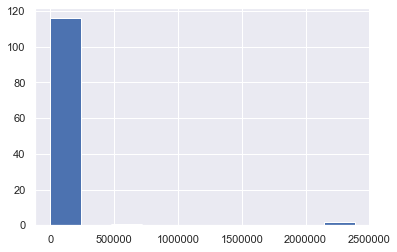

In [13]:
df['SESUCUSA'].value_counts().hist()

In [14]:
cuentas = df["SESUCUSA"].dropna()
cuentas = cuentas.astype(str).astype(int)

In [4]:
df.head()

,CUCONUSE,VECTOR,SESUSERV,SESUSUSC,SESUFEIN,SESUFERE,SESUCATE,SESUSUCA,SESUDEPA,SESULOCA,SESUESCO,SESUCUSA,SESUSAPE,SESUSAAN,SESUCICL,SESUPLFA,SUSCNITC,SERVDESC,DEPADESC,PLSUDESC,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,TIPIFICACION_CLIENTE,SUMA,CANTIDAD,CALIFICACION_VECTOR_SERVICIO,CALIFICACION_VECTOR_CONTRATO,CALIFICACION_VECTOR_CLIENTE,VECTOR_CUALITATIVO_CONTRATO,BANCO_1,BANCO_2,DIA_PAGO_1,DIA_PAGO_2,DIA_PAGO_3,ANALISIS_VECTOR,FECHA_ACTUALIZACION,SISTEMA_ORIGEN,PERFIL_DIGITAL,PORTAFOLIO,FECHA_SUSPENSION,SERVICIO_PRINCIPAL,SEGMENTACION_B2B,GERENCIA_B2B,UEN,LINEA_ABOGADO,TRASLADO,NOMBRE_TRASLADO,REGIONAL
0,494869,441222122222,1,1225809,02.08.06 08:20:46,31.12.32 23:59:59,1,1,4000,9025,1,2,36024,18012,2,4043,92552605,Línea Básica,SUCRE,TRIO ILIMITADO LOCAL RETENCIO,0,0,100,75,75,75,100,75,75,75,75,75,EXISTENTE,800,12,67,67,67,REGULAR,UNE - CFA EN LINEA,UNE - COLPATRIA EN LINEA,8,10,24,SIN IDENTIFICAR,06.06.20 00:00:00,OPEN_EDATEL,NaN,NaN,NaN,NaN,NaN,NaN,B2C,NaN,NaN,NaN,COSTA
1,1641486,428111111111,24,1225538,15.05.13 12:06:15,31.12.32 23:59:59,2,5,2000,512,1,1,37393,0,2,7259,45462610,Internet EDATEL,CORDOBA,DUO INTERNET INAL RETENCION,0,75,65,100,100,100,100,100,100,100,100,100,EXISTENTE,1040,12,87,87,87,BUENO,UNE - COLPATRIA EN LINEA,UNE - CFA EN LINEA,4,3,30,1 PAGO PARCIAL ULTIMOS 12 MESES,06.06.20 00:00:00,OPEN_EDATEL,NaN,NaN,NaN,-1,NaN,NaN,B2B,NaN,NaN,NaN,COSTA
2,1639957,428111111111,1,1225538,15.05.13 12:06:14,31.12.32 23:59:59,2,5,2000,512,1,1,33940,0,2,4041,45462610,Línea Básica,CORDOBA,DUO ILIMITADO INAL RETENCION,0,75,65,100,100,100,100,100,100,100,100,100,EXISTENTE,1040,12,87,87,87,BUENO,UNE - COLPATRIA EN LINEA,UNE - CFA EN LINEA,4,3,30,1 PAGO PARCIAL ULTIMOS 12 MESES,06.06.20 00:00:00,OPEN_EDATEL,NaN,NaN,NaN,-1,NaN,NaN,B2B,NaN,NaN,NaN,COSTA
3,1641541,111122122211,24,1225430,15.05.13 18:27:47,31.12.32 23:59:59,1,1,1000,534,1,0,0,0,2,7154,43501203,Internet EDATEL,ANTIOQUIA,INTERNET 1MB A. O.,100,100,100,100,75,75,100,75,75,75,100,100,EXISTENTE,1075,12,90,90,90,EXCELENTE,UNE - PSE- BOTON DE PAGO,UNE - GANA EN LINEA,5,2,9,PAGO OPORTUNO Y NO OPORTUNO,06.06.20 00:00:00,OPEN_EDATEL,NaN,NaN,NaN,-1,NaN,NaN,B2C,NaN,NaN,NaN,NOROCCIDENTE
4,1641628,543399122211,24,1225769,16.05.13 12:11:58,31.12.32 23:59:59,1,1,2000,519,1,2,100543,40543,3,7395,50953773,Internet EDATEL,CORDOBA,INDIVIDUAL INTERNET,NaN,0,50,50,NaN,NaN,100,75,75,75,100,100,EXISTENTE,625,9,69,69,69,REGULAR,UNE - BANCOLOMBIA,UNE - EN BATCH,16,19,9,2 SUSPENSION ULTIMOS 12 MESES,06.06.20 00:00:00,OPEN_EDATEL,NaN,NaN,NaN,-1,NaN,NaN,B2C,NaN,NaN,NaN,COSTA


In [6]:
df.columns

Index(['CUCONUSE', 'VECTOR', 'SESUSERV', 'SESUSUSC', 'SESUFEIN', 'SESUFERE',
       'SESUCATE', 'SESUSUCA', 'SESUDEPA', 'SESULOCA', 'SESUESCO', 'SESUCUSA',
       'SESUSAPE', 'SESUSAAN', 'SESUCICL', 'SESUPLFA', 'SUSCNITC', 'SERVDESC',
       'DEPADESC', 'PLSUDESC', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'TIPIFICACION_CLIENTE', 'SUMA', 'CANTIDAD',
       'CALIFICACION_VECTOR_SERVICIO', 'CALIFICACION_VECTOR_CONTRATO',
       'CALIFICACION_VECTOR_CLIENTE', 'VECTOR_CUALITATIVO_CONTRATO', 'BANCO_1',
       'BANCO_2', 'DIA_PAGO_1', 'DIA_PAGO_2', 'DIA_PAGO_3', 'ANALISIS_VECTOR',
       'FECHA_ACTUALIZACION', 'SISTEMA_ORIGEN', 'PERFIL_DIGITAL', 'PORTAFOLIO',
       'FECHA_SUSPENSION', 'SERVICIO_PRINCIPAL', 'SEGMENTACION_B2B',
       'GERENCIA_B2B', 'UEN', 'LINEA_ABOGADO', 'TRASLADO', 'NOMBRE_TRASLADO',
       'REGIONAL'],
      dtype='object')

In [5]:
df.shape

(5548249, 58)

In [6]:
df.describe()

,CUCONUSE,VECTOR,SESUSERV,SESUSUSC,SESUFEIN,SESUFERE,SESUCATE,SESUSUCA,SESUDEPA,SESULOCA,SESUESCO,SESUCUSA,SESUSAPE,SESUSAAN,SESUCICL,SESUPLFA,SUSCNITC,SERVDESC,DEPADESC,PLSUDESC,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,TIPIFICACION_CLIENTE,SUMA,CANTIDAD,CALIFICACION_VECTOR_SERVICIO,CALIFICACION_VECTOR_CONTRATO,CALIFICACION_VECTOR_CLIENTE,VECTOR_CUALITATIVO_CONTRATO,BANCO_1,BANCO_2,DIA_PAGO_1,DIA_PAGO_2,DIA_PAGO_3,ANALISIS_VECTOR,FECHA_ACTUALIZACION,SISTEMA_ORIGEN,PERFIL_DIGITAL,PORTAFOLIO,FECHA_SUSPENSION,SERVICIO_PRINCIPAL,SEGMENTACION_B2B,GERENCIA_B2B,UEN,LINEA_ABOGADO,TRASLADO,NOMBRE_TRASLADO,REGIONAL
count,5548249,5548249,5548249,5548249,5548249,5232880,5548249,5548249,5548249,5548249,5548249,5548249,5330624,5242402,5548249,5548249,5548249,5548249,5548249,5548249,2381271,4605684,4379430,4190896,4012060,3858467,3720518,3585410,3460098,3339178,3198954,3198954,5548249,5548249,5548249,5548249,5548249,5548249,5548249,4893888,3565036,4894564,4651416,4423794,5548249,5548249,5548249,4348711,0,238888,5173614,481725,0,5548249,0,0,0,5548247
unique,5494824,273140,337,2382419,1887955,104739,15,31,38,542,29,119,231045,187340,17,3512,1884106,330,43,3485,4,5,5,5,5,5,5,5,5,5,5,5,4,200,13,95,101,101,4,120,133,31,31,31,52,1,4,8,0,101074,383310,3,0,3,0,0,0,6
top,1678616,111111111111,3307,17258641,01.01.00 00:00:00,31.12.32 23:59:59,1,2,5,1,1,0,0,0,4,185,891480000,INTERNET,ANTIOQUIA,PLAN UNICO,100,100,100,100,100,100,100,100,100,100,100,100,EXISTENTE,0,11,100,100,100,EXCELENTE,PSE - BOTON DE PAGOS TD,CFA EN LINEA,2,16,4,PAGO OPORTUNO Y NO OPORTUNO,06.06.20 00:00:00,OPEN_UNE,Banca Tradicional,NaN,14.03.20 01:23:06,-1,Micro,NaN,B2C,NaN,NaN,NaN,NOROCCIDENTE
freq,3,331560,862184,200,70063,4824756,4678906,1805690,2688029,2860990,4602109,2385169,2167547,3786684,828647,732583,332,1341894,2932223,732583,1658096,2407360,2142884,2197609,2184137,2047250,1961519,1856550,1840974,1828829,1779403,1779403,3572237,781518,1787380,1063713,834308,746472,2004481,868373,433224,321014,251616,206653,1550433,5548249,4348711,1635134,NaN,66,4413468,330096,NaN,5130297,NaN,NaN,NaN,2932242


### Vector

In [7]:
dfn=df[['V1','V2','V3','V4','V5','V6','V7', 'V8','V9', 'V10', 'V11','V12']].head()
dfn.dropna()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
0,0,0,100,75,75,75,100,75,75,75,75,75
1,0,75,65,100,100,100,100,100,100,100,100,100
2,0,75,65,100,100,100,100,100,100,100,100,100
3,100,100,100,100,75,75,100,75,75,75,100,100


In [8]:
dfn.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
count,4,5,5,5,4,4,5,5,5,5,5,5
unique,2,3,3,3,2,2,1,2,2,2,2,2
top,0,75,100,100,100,100,100,75,75,75,100,100
freq,3,2,2,3,2,2,5,3,3,3,4,4


In [33]:
SERVDESC = df['SERVDESC'].value_counts()
SERVDESC = SERVDESC.to_frame()
SERVDESC

,SERVDESC
INTERNET,1341894
TELEFONÍA,1210182
TELEVISIÓN,1025005
UNE MÓVIL,226216
Línea Básica,203999
Internet EDATEL,193927
TIGO,168947
Internet,137803
CONSUMOS UNE LD-MOVIL,135722
PAQUETE,107737


## SESUCATE

In [7]:
df["SESUCATE"].value_counts() #Categoria

1     4678906
2      832082
3       20814
8        8181
91       3304
5        2489
4        1268
6         703
17        433
90         49
16          9
12          5
7           4
10          1
9           1
Name: SESUCATE, dtype: int64

## DEPADESC

In [45]:
df["DEPADESC"].value_counts() 

ANTIOQUIA                         2932223
RISARALDA                          395421
Distrito Capital De Bogota         375045
VALLE DEL CAUCA                    308998
ATLANTICO                          240897
SANTANDER                          230194
BOLÍVAR                            207648
Caldas                             179431
Quindío                             98596
TOLIMA                              72204
MAGDALENA                           61300
CÉSAR                               58704
CÓRDOBA                             51703
CORDOBA                             45933
SUCRE                               42769
NORTE DE SANTANDER                  36656
CUNDINAMARCA                        33911
Valle del Cauca                     32210
META                                28207
QUINDIO                             24169
CAUCA                               23198
CESAR                               19428
BOYACÁ                              19120
NARIÑO                            

## TIPIFICACION_CLIENTE

In [44]:
df["TIPIFICACION_CLIENTE"].value_counts() 

EXISTENTE          3572237
NUEVO               892509
NUEVO EXISTENTE     727176
RETIRADO            356327
Name: TIPIFICACION_CLIENTE, dtype: int64

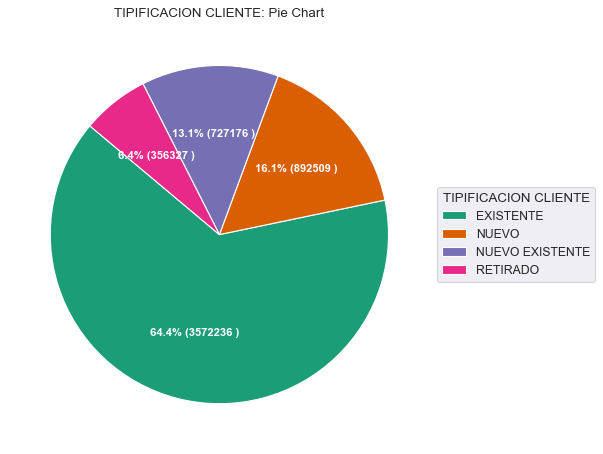

In [23]:
# Prepare Data
df_tip = df.groupby('TIPIFICACION_CLIENTE').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df_tip['counts']
categories = df_tip['TIPIFICACION_CLIENTE']
explode = [0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="TIPIFICACION CLIENTE", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("TIPIFICACION CLIENTE: Pie Chart")
plt.show()

## ANALISIS_VECTOR

In [42]:
df["ANALISIS_VECTOR"].value_counts() 

PAGO OPORTUNO Y NO OPORTUNO         1550433
PAGO OPORTUNO                       1453704
1 PAGO PARCIAL ULTIMOS 12 MESES      493247
FACTURAS AJUSTADAS                   483469
PAGO NO OPORTUNO                     244914
2 PAGO PARCIAL ULTIMOS 12 MESES      214543
3 PAGO PARCIAL ULTIMOS 12 MESES      117958
SIN IDENTIFICAR                      113942
4 PAGO PARCIAL ULTIMOS 12 MESES       89935
10 PAGO PARCIAL ULTIMOS 12 MESES      89663
5 PAGO PARCIAL ULTIMOS 12 MESES       65485
6 PAGO PARCIAL ULTIMOS 12 MESES       63336
8 PAGO PARCIAL ULTIMOS 12 MESES       60995
PROBLEMAS RECLAMACION                 58408
7 PAGO PARCIAL ULTIMOS 12 MESES       52338
SIN PAGO 1 FACTURAS                   49032
9 PAGO PARCIAL ULTIMOS 12 MESES       45530
1 PAGOS PARCIAL                       26089
SIN PAGO 2 FACTURAS                   23830
11 PAGO PARCIAL ULTIMOS 12 MESES      23561
SIN PAGO 3 FACTURAS                   22356
11 SUSPENSION ULTIMOS 12 MESES        22095
10 SUSPENSION ULTIMOS 12 MESES  

## SEGMENTACION_B2B

In [41]:
df["SEGMENTACION_B2B"].value_counts() 

Micro     330096
Medium     80533
Small      71096
Name: SEGMENTACION_B2B, dtype: int64

### CANTIDAD Facturas

In [28]:
facturas = df["CANTIDAD"].dropna()
facturas = facturas.astype(str).astype(int)

In [ ]:
df['CANTIDAD'].value_counts()

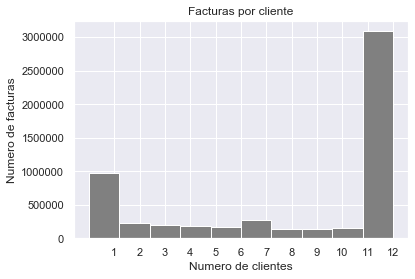

In [29]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.hist(facturas, color="gray")
plt.grid(axis='y', alpha=1)
plt.xlabel('Numero de clientes')
plt.ylabel('Numero de facturas')
plt.title('Facturas por cliente')
plt.xticks(x)
plt.show()

### CALIFICACION_VECTOR_SERVICIO

In [25]:
calificacion_servicio = df['CALIFICACION_VECTOR_SERVICIO']
calificacion_servicio = calificacion_servicio.astype(str).astype(int)

In [26]:
criteria = [calificacion_servicio.between(75, 100), calificacion_servicio.between(60, 74), calificacion_servicio.between(0, 59)]
values = ['Pago Oprtuno', 'Pago no Oportuno', 'No Pago']

df['Rangos_calificacion_servicio'] = np.select(criteria, values, 0)

calificacion_servicio = df['Rangos_calificacion_servicio'].value_counts()
calificacion_servicio = calificacion_servicio.to_frame()
calificacion_servicio = calificacion_servicio.sort_values(by = 'Rangos_calificacion_servicio', ascending=True)
calificacion_servicio.head()

,Rangos_calificacion_servicio
Pago no Oportuno,659367
No Pago,1270831
Pago Oprtuno,3618051


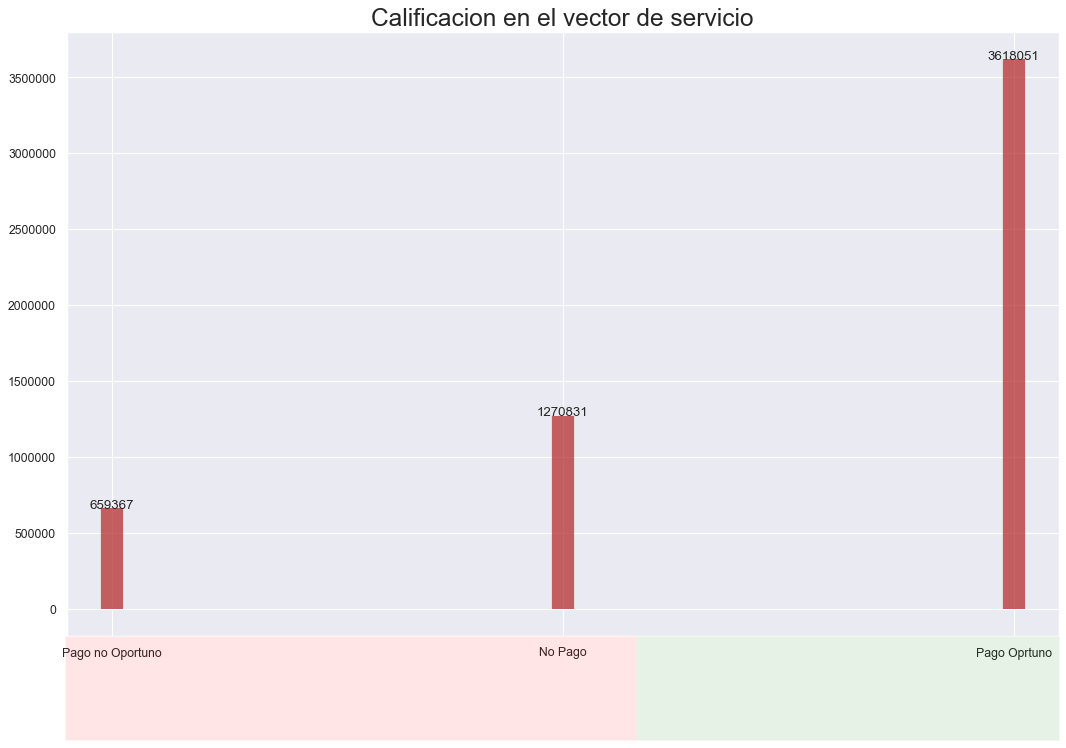

In [27]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=calificacion_servicio.index, ymin=0, ymax=calificacion_servicio.Rangos_calificacion_servicio, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, calificacion_servicio in enumerate(calificacion_servicio.Rangos_calificacion_servicio):
    ax.text(i, calificacion_servicio+0.5, round(calificacion_servicio, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Calificacion en el vector de servicio', fontdict={'size':22})
#ax.set(ylabel='Frecuencia', ylim=(0, 30))
#plt.xticks(vector_cualitativo.index, vector_cualitativo.index, rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

### CALIFICACION_VECTOR_CONTRATO

In [25]:
calificacion_contrato = df['CALIFICACION_VECTOR_CONTRATO']
calificacion_contrato = calificacion_contrato.astype(str).astype(int)

In [26]:
criteria = [calificacion_contrato.between(75, 100), calificacion_contrato.between(60, 74), calificacion_contrato.between(0, 59)]
values = ['Pago Oprtuno', 'Pago no Oportuno', 'No Pago']

df['Rangos_calificacion_contrato'] = np.select(criteria, values, 0)

calificacion_contrato = df['Rangos_calificacion_contrato'].value_counts()
calificacion_contrato = calificacion_contrato.to_frame()
calificacion_contrato = calificacion_contrato.sort_values(by = 'Rangos_calificacion_contrato', ascending=True)
calificacion_contrato.head()

,Rangos_calificacion_contrato
Pago no Oportuno,784764
No Pago,1348213
Pago Oprtuno,3415272


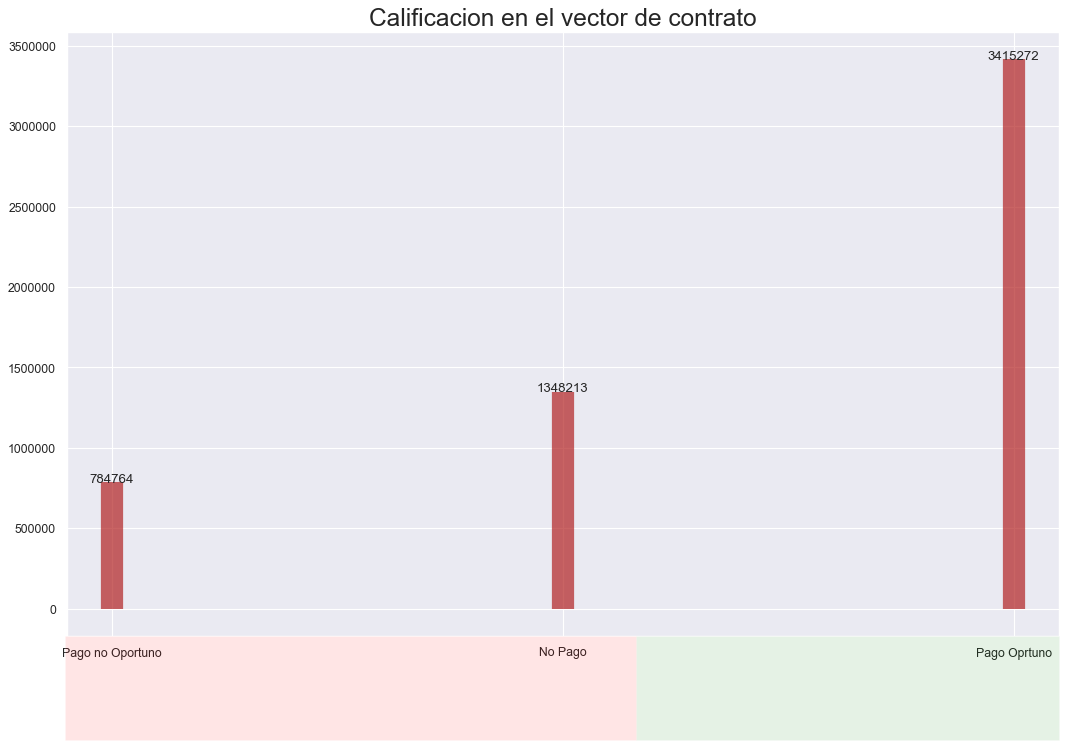

In [24]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=calificacion_contrato.index, ymin=0, ymax=calificacion_contrato.Rangos_calificacion_contrato, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, calificacion_contrato in enumerate(calificacion_contrato.Rangos_calificacion_contrato):
    ax.text(i, calificacion_contrato+0.5, round(calificacion_contrato, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Calificacion en el vector de contrato', fontdict={'size':22})
#ax.set(ylabel='Frecuencia', ylim=(0, 30))
#plt.xticks(vector_cualitativo.index, vector_cualitativo.index, rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

### CALIFICACION_VECTOR_CLIENTE

In [19]:
calificacion_cliente = df['CALIFICACION_VECTOR_CLIENTE']
calificacion_cliente = calificacion_cliente.astype(str).astype(int)

In [20]:
criteria = [calificacion_cliente.between(75, 100), calificacion_cliente.between(60, 74), calificacion_cliente.between(0, 59)]
values = ['Pago Oprtuno', 'Pago no Oportuno', 'No Pago']

df['Rangos_calificacion_cliente'] = np.select(criteria, values, 0)

calificacion_cliente = df['Rangos_calificacion_cliente'].value_counts()
calificacion_cliente = calificacion_cliente.to_frame()
calificacion_cliente = calificacion_cliente.sort_values(by = 'Rangos_calificacion_cliente', ascending=True)
calificacion_cliente.head()

,Rangos_calificacion_cliente
Pago no Oportuno,782543
No Pago,1451902
Pago Oprtuno,3313804


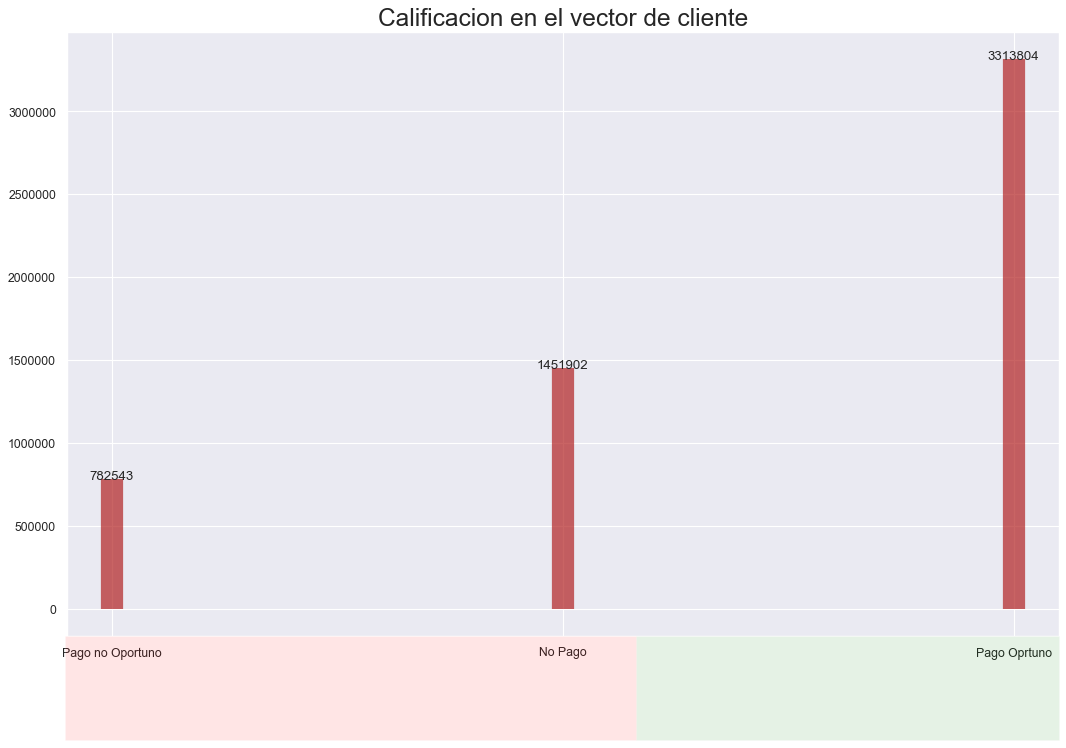

In [21]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=calificacion_cliente.index, ymin=0, ymax=calificacion_cliente.Rangos_calificacion_cliente, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, calificacion_cliente in enumerate(calificacion_cliente.Rangos_calificacion_cliente):
    ax.text(i, calificacion_cliente+0.5, round(calificacion_cliente, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Calificacion en el vector de cliente', fontdict={'size':22})
#ax.set(ylabel='Frecuencia', ylim=(0, 30))
#plt.xticks(vector_cualitativo.index, vector_cualitativo.index, rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

### VECTOR_CUALITATIVO_CONTRATO

In [17]:
vector_cualitativo = df['VECTOR_CUALITATIVO_CONTRATO'].value_counts()
vector_cualitativo = vector_cualitativo.to_frame()
vector_cualitativo.head()

,VECTOR_CUALITATIVO_CONTRATO
EXCELENTE,2004481
BUENO,1280754
REGULAR,1280173
MALO,982841


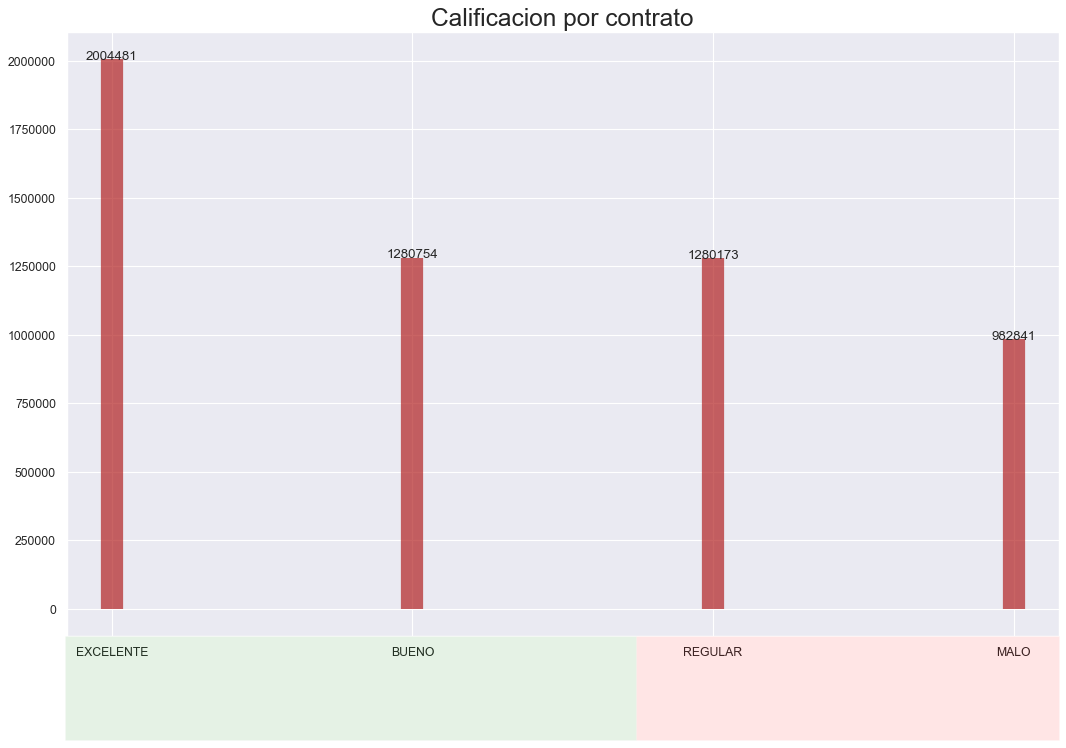

In [18]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=vector_cualitativo.index, ymin=0, ymax=vector_cualitativo.VECTOR_CUALITATIVO_CONTRATO, color='firebrick', alpha=0.7, linewidth=20)


# Annotate Text
for i, VECTOR_CUALITATIVO_CONTRATO in enumerate(vector_cualitativo.VECTOR_CUALITATIVO_CONTRATO):
    ax.text(i, VECTOR_CUALITATIVO_CONTRATO+0.5, round(VECTOR_CUALITATIVO_CONTRATO, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Calificacion por contrato', fontdict={'size':22})
#ax.set(ylabel='Frecuencia', ylim=(0, 30))
#plt.xticks(vector_cualitativo.index, vector_cualitativo.index, rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

### Banco 1

In [28]:
banco1 = df['BANCO_1'].value_counts()
banco1 = banco1.to_frame()
banco1

,BANCO_1
PSE - BOTON DE PAGOS TD,868373
GANA EN LINEA,819201
BRINKS CDE,462331
CFA EN LINEA,432835
BANCOLOMBIA EN LINEA CORRESPONSALES,420523
COLPATRIA EN LINEA,389463
FACTURANET,135699
COTRAFA EN LINEA,98736
UNE - BANCOLOMBIA,94154
UNE - GANA EN LINEA,94040


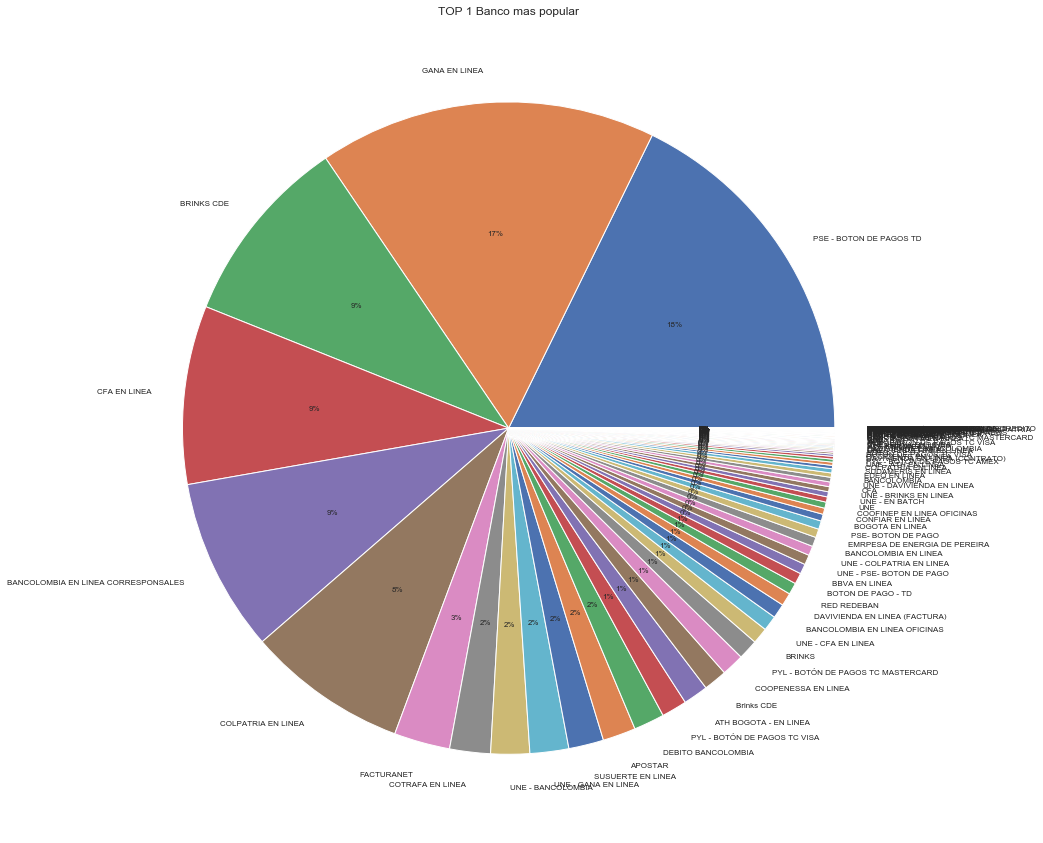

In [16]:
plot = banco1.plot.pie(y='BANCO_1', figsize=(15, 15), autopct='%1.0f%%', legend = None, fontsize = (8))
plt.title("TOP 1 Banco mas popular")
plt.ylabel("")
plt.show()

### Banco 2

In [13]:
banco2 = df['BANCO_2'].value_counts()
banco2 = banco2.to_frame()
banco2.head()

,BANCO_2
CFA EN LINEA,433224
PSE - BOTON DE PAGOS TD,414280
COLPATRIA EN LINEA,403049
BANCOLOMBIA EN LINEA CORRESPONSALES,372304
GANA EN LINEA,361549


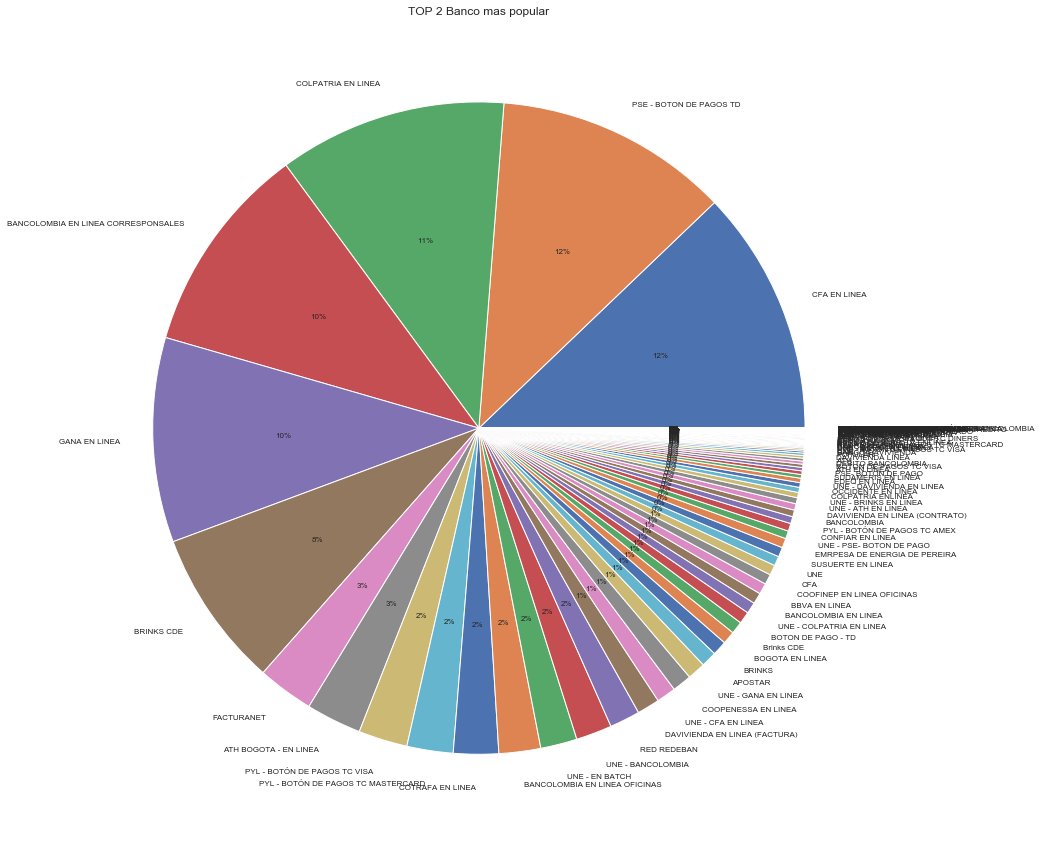

In [14]:
plot = banco2.plot.pie(y='BANCO_2', figsize=(15, 15), autopct='%1.0f%%', legend = None, fontsize = (8))
plt.title("TOP 2 Banco mas popular")
plt.ylabel("")
plt.show()

### Dia 1 mas utilizado para hacer pagos

In [11]:
dia1 = df["DIA_PAGO_1"].dropna()
dia1 = dia1.astype(str).astype(int)

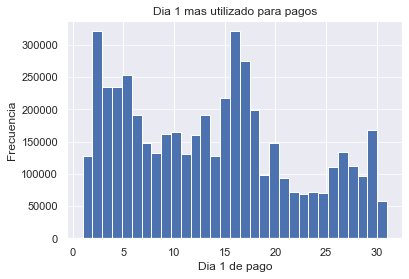

In [12]:
plt.hist(dia1, bins=31)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Dia 1 de pago')
plt.ylabel('Frecuencia')
plt.title('Dia 1 mas utilizado para pagos')
plt.show()

### Dia 2 mas utilizado para hacer pagos

In [9]:
dia2 = df["DIA_PAGO_2"].dropna()
dia2 = dia2.astype(str).astype(int)

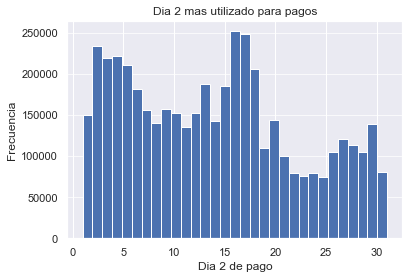

In [10]:
plt.hist(dia2, bins=31)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Dia 2 de pago')
plt.ylabel('Frecuencia')
plt.title('Dia 2 mas utilizado para pagos')
plt.show()

### Dia 3 mas utilizado para hacer pagos

In [7]:
dia3 = df["DIA_PAGO_3"].dropna()
dia3 = dia3.astype(str).astype(int)

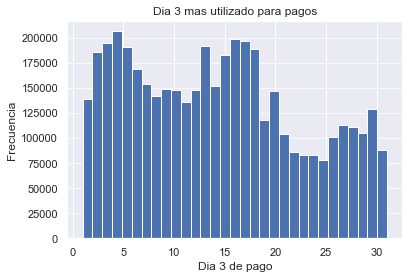

In [8]:
plt.hist(dia3, bins=31)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Dia 3 de pago')
plt.ylabel('Frecuencia')
plt.title('Dia 3 mas utilizado para pagos')
plt.show()

### REGION

In [4]:
regional = df["REGIONAL"].value_counts()
regional = regional.to_frame()
regional.head()

,REGIONAL
NOROCCIDENTE,2932242
EJE CAFETERO,772866
COSTA,737248
CENTRO,443673
SUR,376211


In [54]:
regional.shape

(6, 2)

In [30]:
regional = df.groupby('REGIONAL').size().reset_index(name='counts')

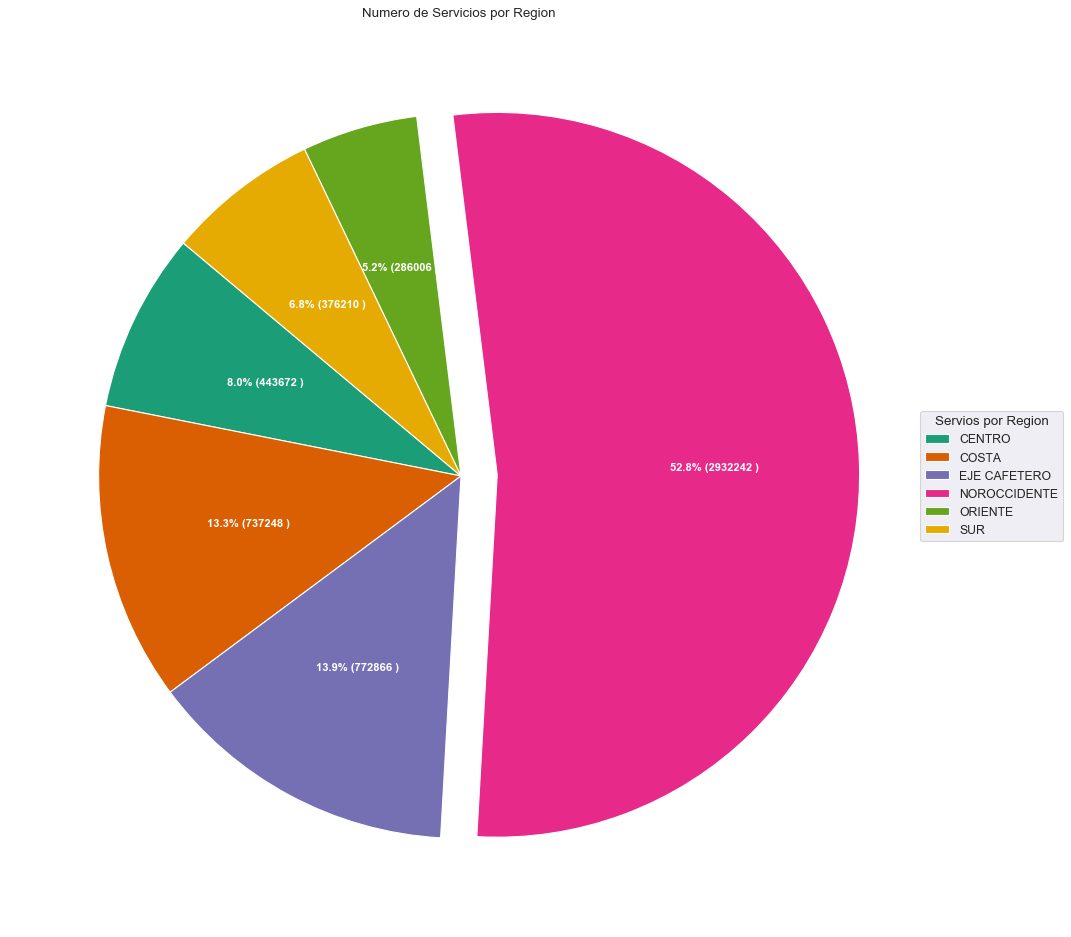

In [74]:
# Draw Plot
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"), dpi= 80)

#data = regional['counts']
categories = regional['REGIONAL']
explode = [0,0,0,0.1,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)     

# Decoration
ax.legend(wedges, categories, title="Servios por Region", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Numero de Servicios por Region ")
plt.show()

## SESUSAPE

In [34]:
df.SESUSAPE.head()

0     36024
1     37393
2     33940
3         0
4    100543
Name: SESUSAPE, dtype: object